# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de dos modelos con la misma arquitectura entrenados con datos captados con
microcontrolador y con datos de fuentes externas respectivamente.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/audio/test"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
ext_data_all_dir = f"{project_dir}/samples/external/audio/all"
micro_model_dir = f"{saved_models_dir}/tensorflow/MicroAudioDataModel"
ext_model_dir = f"{saved_models_dir}/tensorflow/ExtAudioDataModel"
label_index_dir = f"{saved_models_dir}/label index mappings"
micro_label_index_path = f"{label_index_dir}/MicroAudioDataModel.joblib"
ext_label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo entrenado con datos de origen externo
Comprobamos el rendimiento del modelo entrenado con datos de origen externo con la partición test de los
datos de origen externo y con el conjunto de imágenes obtenidas con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/ExtAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/test".
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


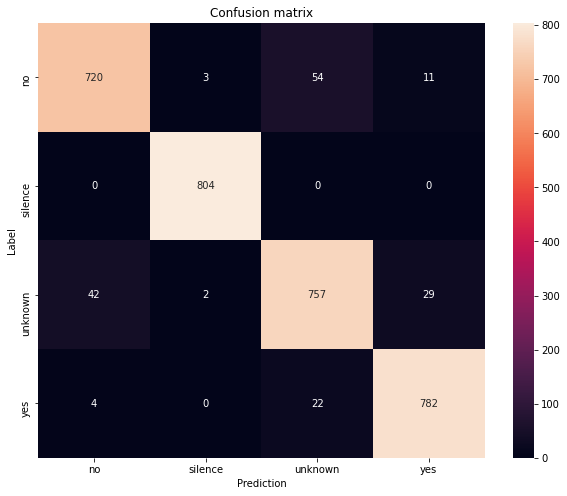

              precision    recall  f1-score   support

          no    0.93995   0.91371   0.92664       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95134   0.96782   0.95951       808

    accuracy                        0.94830      3230
   macro avg    0.94847   0.94839   0.94836      3230
weighted avg    0.94819   0.94830   0.94818      3230

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/all".
Using 452 samples.


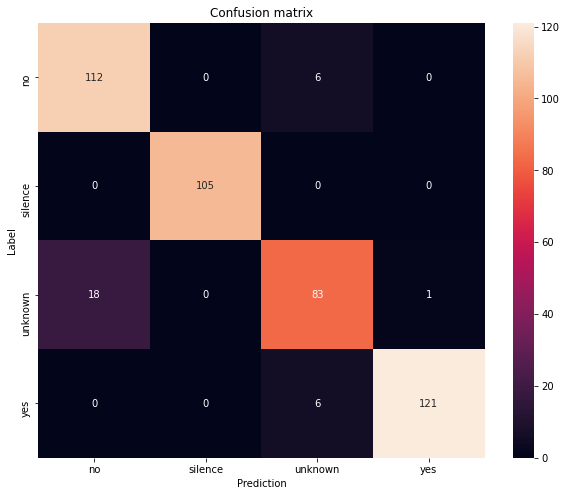

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.87368   0.81373   0.84264       102
         yes    0.99180   0.95276   0.97189       127

    accuracy                        0.93142       452
   macro avg    0.93176   0.92891   0.92944       452
weighted avg    0.93305   0.93142   0.93133       452



In [3]:
tensorflow_model_evaluation(ext_model_dir, ext_label_index_path, [ext_data_test_dir, micro_data_all_dir])

## Modelo entrenado con datos obtenidos con microcontrolador
Comprobamos el rendimiento del modelo entrenado con datos obtenidos con microcontrolador con la partición test de los
datos obtenidos con microcontrolador y con la partición test de los datos de origen externo.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/MicroAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/test".
Using 91 samples.


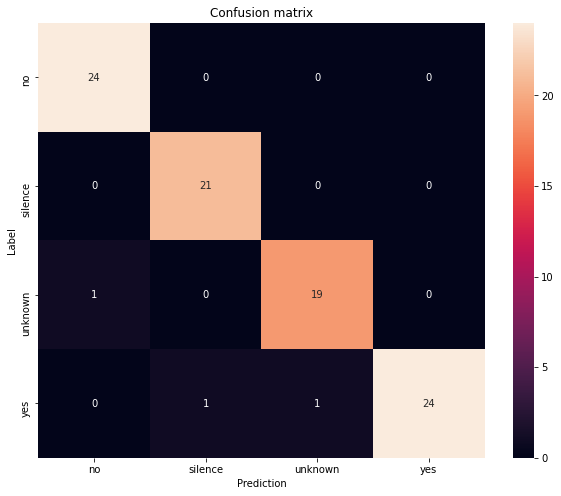

              precision    recall  f1-score   support

          no    0.96000   1.00000   0.97959        24
     silence    0.95455   1.00000   0.97674        21
     unknown    0.95000   0.95000   0.95000        20
         yes    1.00000   0.92308   0.96000        26

    accuracy                        0.96703        91
   macro avg    0.96614   0.96827   0.96658        91
weighted avg    0.96797   0.96703   0.96683        91

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/all".
Using 16154 samples.


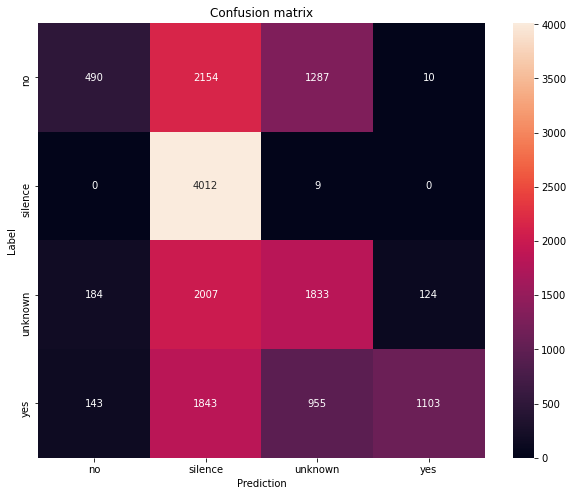

              precision    recall  f1-score   support

          no    0.59976   0.12433   0.20597      3941
     silence    0.40056   0.99776   0.57163      4021
     unknown    0.44882   0.44190   0.44534      4148
         yes    0.89167   0.27275   0.41772      4044

    accuracy                        0.46044     16154
   macro avg    0.58520   0.45919   0.41017     16154
weighted avg    0.58450   0.46044   0.41146     16154



In [4]:
tensorflow_model_evaluation(micro_model_dir, micro_label_index_path, [micro_data_test_dir, ext_data_all_dir])